# Import Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data and Description

## Load Data

In [ ]:
df = pd.read_csv('/content/flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


## About Dataset

| **Kode**            | **Deskripsi**                                                 |
| ------------------- | ------------------------------------------------------------- |
| `MEMBER_NO`         | ID Member                                                     |
| `FFP_DATE`          | Tanggal bergabung Frequent Flyer Program                      |
| `FIRST_FLIGHT_DATE` | Tanggal penerbangan pertama                                   |
| `GENDER`            | Jenis Kelamin                                                 |
| `FFP_TIER`          | Tier dari Frequent Flyer Program                              |
| `WORK_CITY`         | Kota Asal                                                     |
| `WORK_PROVINCE`     | Provinsi Asal                                                 |
| `WORK_COUNTRY`      | Negara Asal                                                   |
| `AGE`               | Umur Customer                                                 |
| `LOAD_TIME`         | Tanggal data diambil                                          |
| `FLIGHT_COUNT`      | Jumlah penerbangan Customer                                   |
| `BP_SUM`            | Rencana Perjalanan                                            |
| `SUM_YR_1`          | Total credit/point di tahun pertama                           |
| `SUM_YR_2`          | Total credit/point di tahun kedua                             |
| `SEG_KM_SUM`        | Total jarak (km) penerbangan yang sudah dilakukan             |
| `LAST_FLIGHT_DATE`  | Tanggal penerbangan terakhir                                  |
| `LAST_TO_END`       | Jarak waktu penerbangan terakhir ke pesanan penerbangan akhir |
| `AVG_INTERVAL`      | Rata-rata jarak waktu antar penerbangan                       |
| `MAX_INTERVAL`      | Jarak waktu maksimum antar penerbangan                        |
| `EXCHANGE_COUNT`    | Jumlah penukaran                                              |
| `avg_discount`      | Rata-rata diskon yang didapat customer                        |
| `Points_Sum`        | Jumlah poin yang didapat customer                             |
| `Point_NotFlight`   | Poin yang tidak digunakan oleh member                         |


## Data Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

Dari informasi tipe data:

1. Untuk kolom FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, LAST_FLIGHT_DATE seharusnya bertipe datetime karena merupakan data tanggal.

2. Untuk kolom AGE lebih ideal menggunakan tipe data int64.

3. Dataframe tersebut memiliki total 62.988 baris dan 23 kolom.

4. Missing Values terlihat pada kolom GENDER, WORK_CITY, WORK_PROVINCE, WORK_COUNTRY, AGE, SUM_YR_1,SUM_YR_2.

Dari informasi di atas, kita bisa memisahkan kolom kategorikal dan numerik sebagai berikut:

In [ ]:
#Numeric
numeric = df.loc[:, (df.dtypes == int) | (df.dtypes == float)].columns.tolist()
numeric

['MEMBER_NO',
 'FFP_TIER',
 'AGE',
 'FLIGHT_COUNT',
 'BP_SUM',
 'SUM_YR_1',
 'SUM_YR_2',
 'SEG_KM_SUM',
 'LAST_TO_END',
 'AVG_INTERVAL',
 'MAX_INTERVAL',
 'EXCHANGE_COUNT',
 'avg_discount',
 'Points_Sum',
 'Point_NotFlight']

In [ ]:
#Categorical
categorical = df.loc[:, (df.dtypes != int) & (df.dtypes != float)].columns.tolist()
categorical

['FFP_DATE',
 'FIRST_FLIGHT_DATE',
 'GENDER',
 'WORK_CITY',
 'WORK_PROVINCE',
 'WORK_COUNTRY',
 'LOAD_TIME',
 'LAST_FLIGHT_DATE']

## Statistical Summary

In [ ]:
df[numeric].describe().apply(lambda x: x.apply('{0:.5f}'.format))

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.00000,62988.00000,62568.00000,62988.00000,62988.00000,62437.00000,62850.00000,62988.00000,62988.00000,62988.00000,62988.00000,62988.00000,62988.00000,62988.00000,62988.00000
mean,31494.50000,4.10216,42.47635,11.83941,10925.08125,5355.37606,5604.02601,17123.87869,176.12010,67.74979,166.03390,0.31978,0.72156,12545.77710,2.72815
std,18183.21371,0.37386,9.88591,14.04947,16339.48615,8109.45015,8703.36425,20960.84462,183.82222,77.51787,123.39718,1.13600,0.18543,20507.81670,7.36416
min,1.00000,4.00000,6.00000,2.00000,0.00000,0.00000,0.00000,368.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,15747.75000,4.00000,35.00000,3.00000,2518.00000,1003.00000,780.00000,4747.00000,29.00000,23.37037,79.00000,0.00000,0.61200,2775.00000,0.00000
50%,31494.50000,4.00000,41.00000,7.00000,5700.00000,2800.00000,2773.00000,9994.00000,108.00000,44.66667,143.00000,0.00000,0.71186,6328.50000,0.00000
75%,47241.25000,4.00000,48.00000,15.00000,12831.00000,6574.00000,6845.75000,21271.25000,268.00000,82.00000,228.00000,0.00000,0.80948,14302.50000,1.00000
max,62988.00000,6.00000,110.00000,213.00000,505308.00000,239560.00000,234188.00000,580717.00000,731.00000,728.00000,728.00000,46.00000,1.50000,985572.00000,140.00000


Statistical summary pada kolom numerik:

1. Terdapat 15 kolom numerik
2. Untuk kolom MEMBER_NO, FFP_TIER dan avg_discount terlihat memiliki distribusi normal dengan nilai rata-rata yang sama/dekat dengan median.
3. Mayoritas kolom numerik berdistribusi Skew maka terdapat outliers
4. Pada kolom AGE ada customer yang berusia 110 dan ini merupakan outliers dapat di hapus.

In [ ]:
df[categorical].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62985,60719,59740,62962,62988,62988
unique,3068,3406,2,3234,1165,118,1,731
top,1/13/2011,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,184,96,48134,9386,17509,57748,62988,959


Statistical summary pada kolom kategorikal:

1. Terdapat 8 Kolom kategorikal.
2. Mayoritas customer itu ada pada customer gender male (laki-laki).


# Data Preprocessing

## Check Missing Value

In [ ]:
df_clean = df.copy()

In [ ]:
data_missing_value = df_clean.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df_clean))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,WORK_PROVINCE,3248,5.157
1,WORK_CITY,2269,3.602
2,SUM_YR_1,551,0.875
3,AGE,420,0.667
4,SUM_YR_2,138,0.219
5,WORK_COUNTRY,26,0.041
6,GENDER,3,0.005


In [ ]:
col_missing_value = data_missing_value['feature'].tolist()
df_clean[col_missing_value].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   WORK_PROVINCE  59740 non-null  object 
 1   WORK_CITY      60719 non-null  object 
 2   SUM_YR_1       62437 non-null  float64
 3   AGE            62568 non-null  float64
 4   SUM_YR_2       62850 non-null  float64
 5   WORK_COUNTRY   62962 non-null  object 
 6   GENDER         62985 non-null  object 
dtypes: float64(3), object(4)
memory usage: 3.4+ MB


Terdapat 7 missing value dan presentase terbesar ada pada kolom WORK_PROVINCE dan WORK_CITY

## Handle Missing Value

In [ ]:
missing_col = ['SUM_YR_1', 'AGE', 'SUM_YR_2', 'WORK_COUNTRY', 'GENDER']
for col in missing_col:
  df_clean.dropna(subset=[col], inplace=True)

Karena presentase < 1% maka kita drop

In [ ]:
df_clean['WORK_CITY'].fillna(df_clean['WORK_CITY'].mode()[0], inplace=True)
df_clean['WORK_PROVINCE'].fillna(df_clean['WORK_PROVINCE'].mode()[0], inplace=True)

Karena WORK_PROVINCE dan WORK_CITY presentase lebih besar maka isi menggunakan mode (modus).

In [ ]:
data_missing_value = df_clean.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value

,feature,missing_value
0,MEMBER_NO,0
1,FFP_DATE,0
2,FIRST_FLIGHT_DATE,0
3,GENDER,0
4,FFP_TIER,0
5,WORK_CITY,0
6,WORK_PROVINCE,0
7,WORK_COUNTRY,0
8,AGE,0
9,LOAD_TIME,0


Tidak ada missing value. Aman.

## Format Data Type

In [ ]:
# Change the data type in the AGE column from float64 to int64

df_clean['AGE'] = df_clean['AGE'].astype(int)

In [ ]:
date_col = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']
for col in date_col:
    df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')

## Data Duplicates

In [ ]:
df_clean.duplicated().sum()

np.int64(0)

Tidak ada duplikasi data.

In [ ]:
df_clean.shape

(61856, 23)

In [ ]:
#Numeric
numeric = df_clean.loc[:, (df_clean.dtypes == int) | (df_clean.dtypes == float)].columns.tolist()
numeric

['MEMBER_NO',
 'FFP_TIER',
 'AGE',
 'FLIGHT_COUNT',
 'BP_SUM',
 'SUM_YR_1',
 'SUM_YR_2',
 'SEG_KM_SUM',
 'LAST_TO_END',
 'AVG_INTERVAL',
 'MAX_INTERVAL',
 'EXCHANGE_COUNT',
 'avg_discount',
 'Points_Sum',
 'Point_NotFlight']

In [ ]:
#Categorical
categorical = df_clean.loc[:, (df.dtypes != int) & (df.dtypes != float)].columns.tolist()
categorical

['FFP_DATE',
 'FIRST_FLIGHT_DATE',
 'GENDER',
 'WORK_CITY',
 'WORK_PROVINCE',
 'WORK_COUNTRY',
 'LOAD_TIME',
 'LAST_FLIGHT_DATE']

# EDA

## Univariate Analysis

### Box Plot

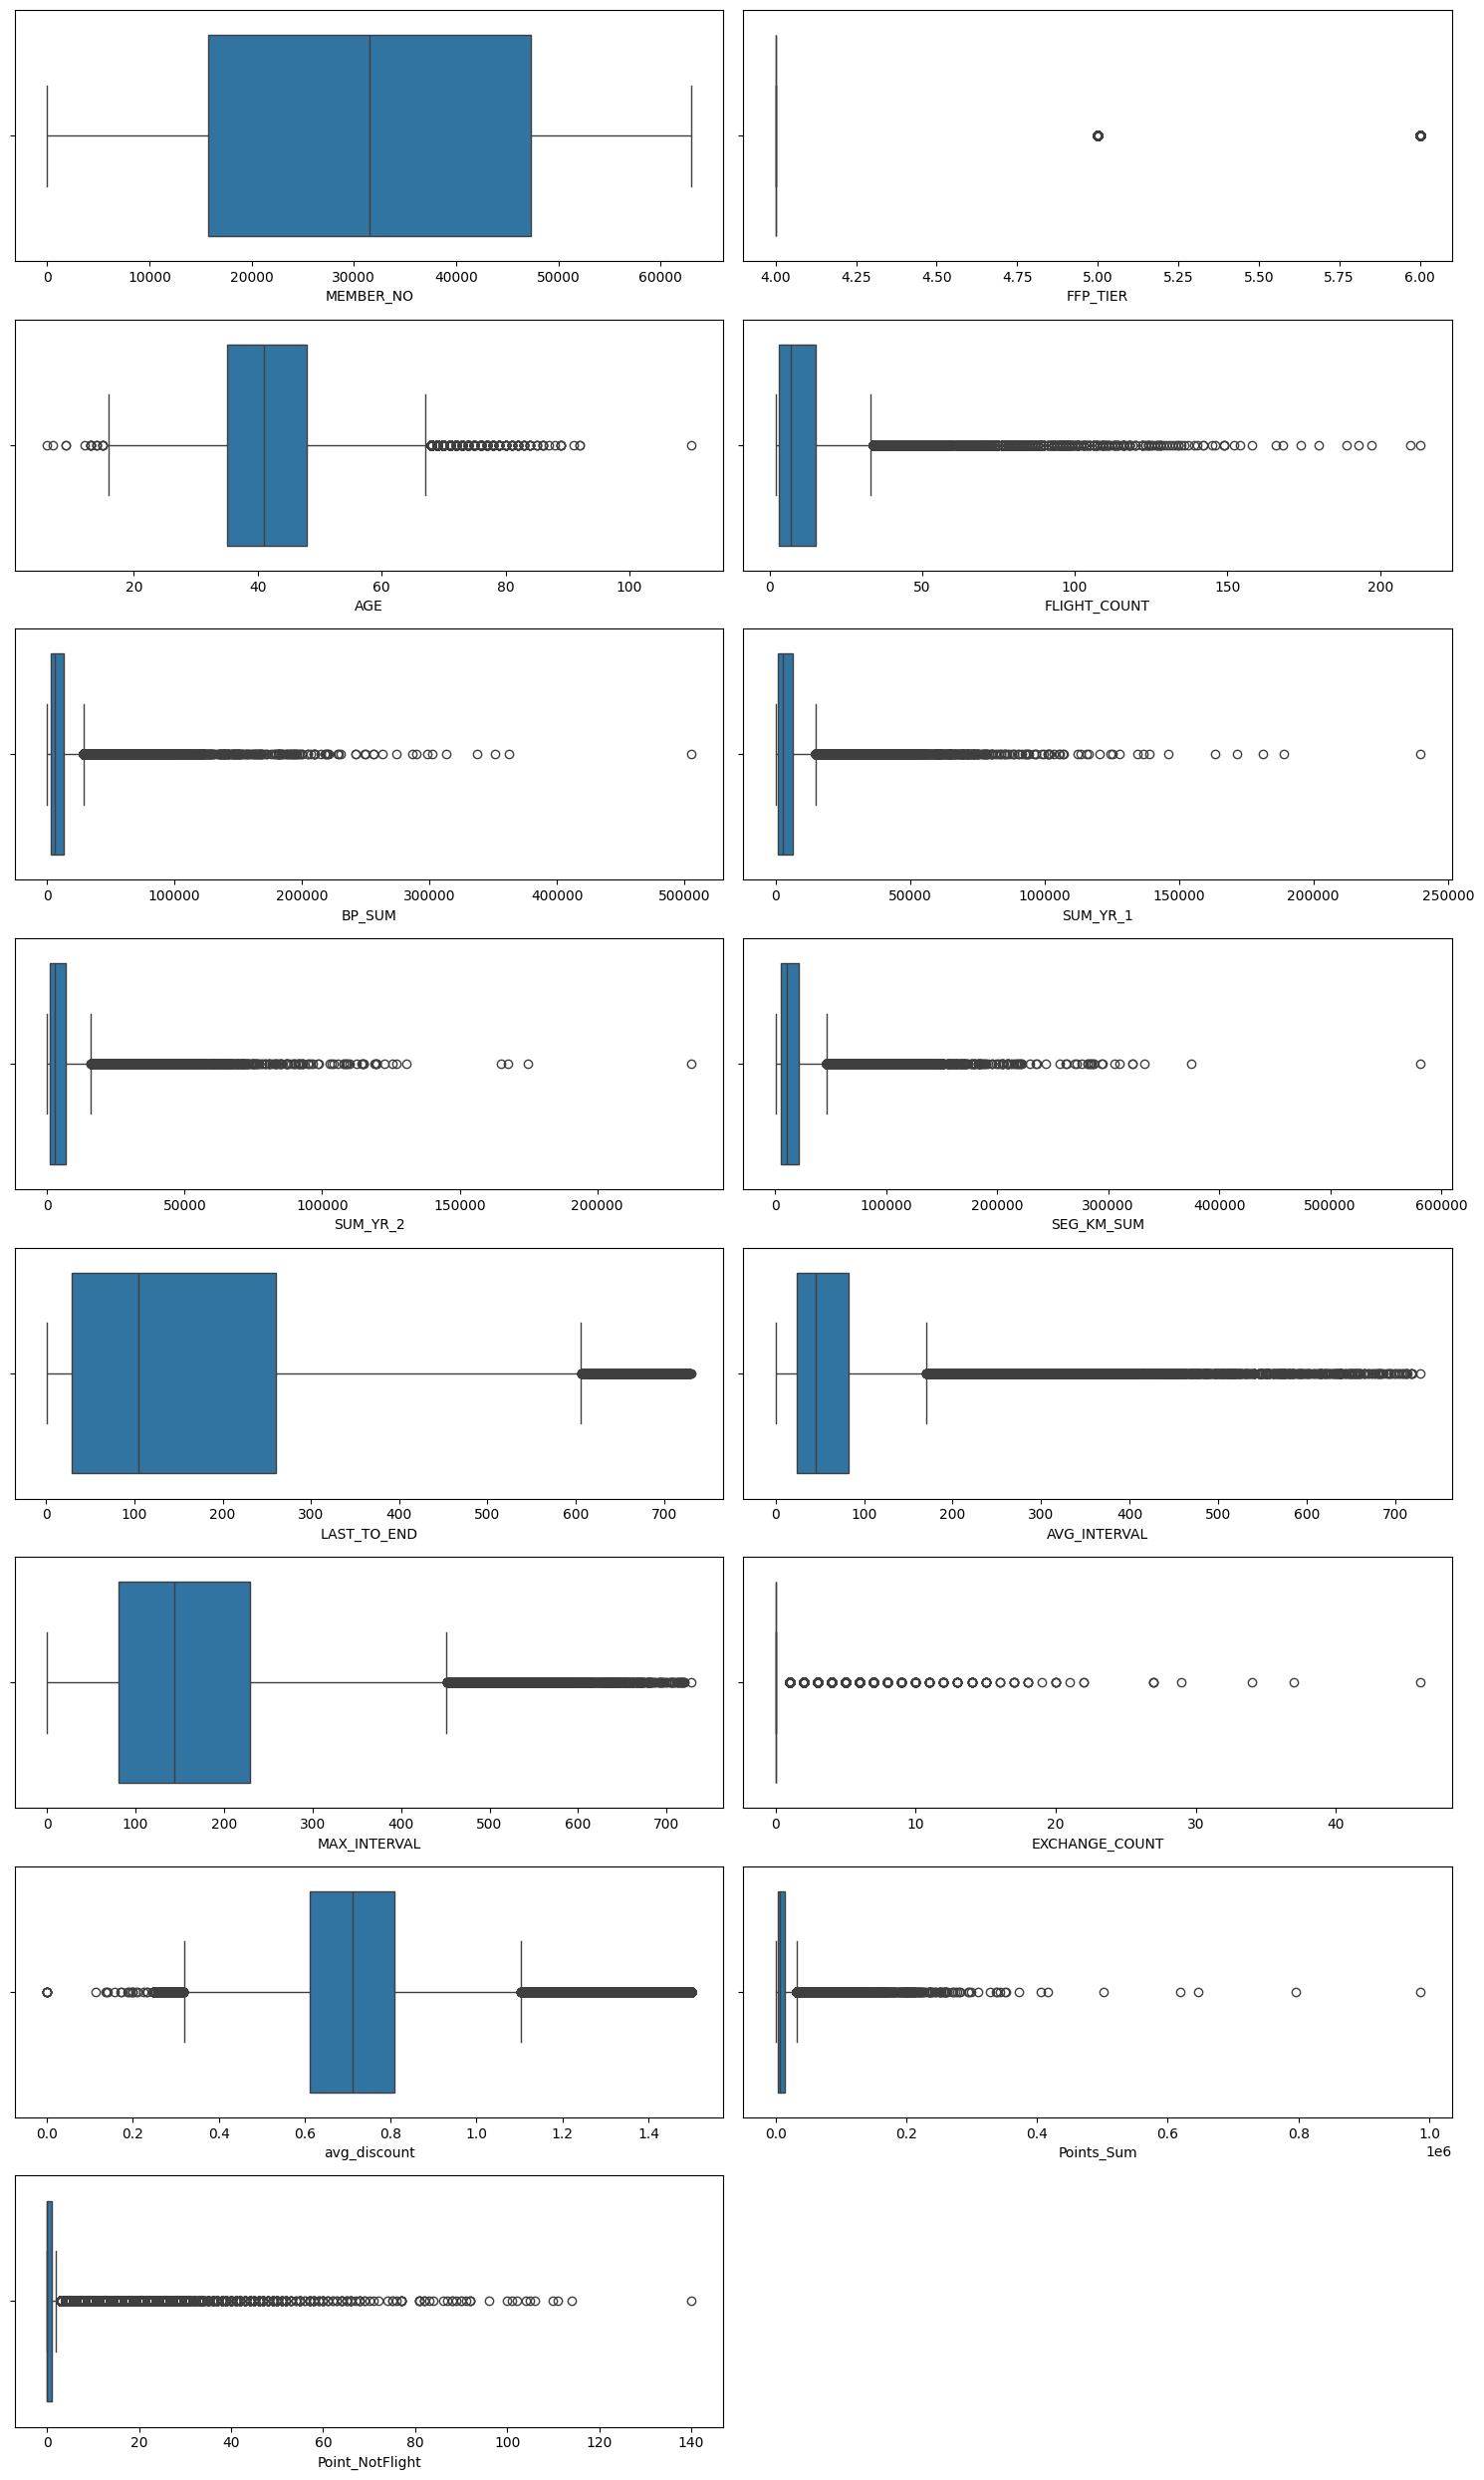

In [ ]:
# boxplot visualization for numerical data

plt.figure(figsize=(15, 25))
for i in range(0, len(numeric)):
    plt.subplot(8, 2, i+1)
    sns.boxplot(x=df_clean[numeric[i]])
    plt.tight_layout()

plt.show()

Mayoritas kolom memiliki pencilan, kecuali untuk kolom MEMBER_NO dan FFP_TIER

### Distribution Plot

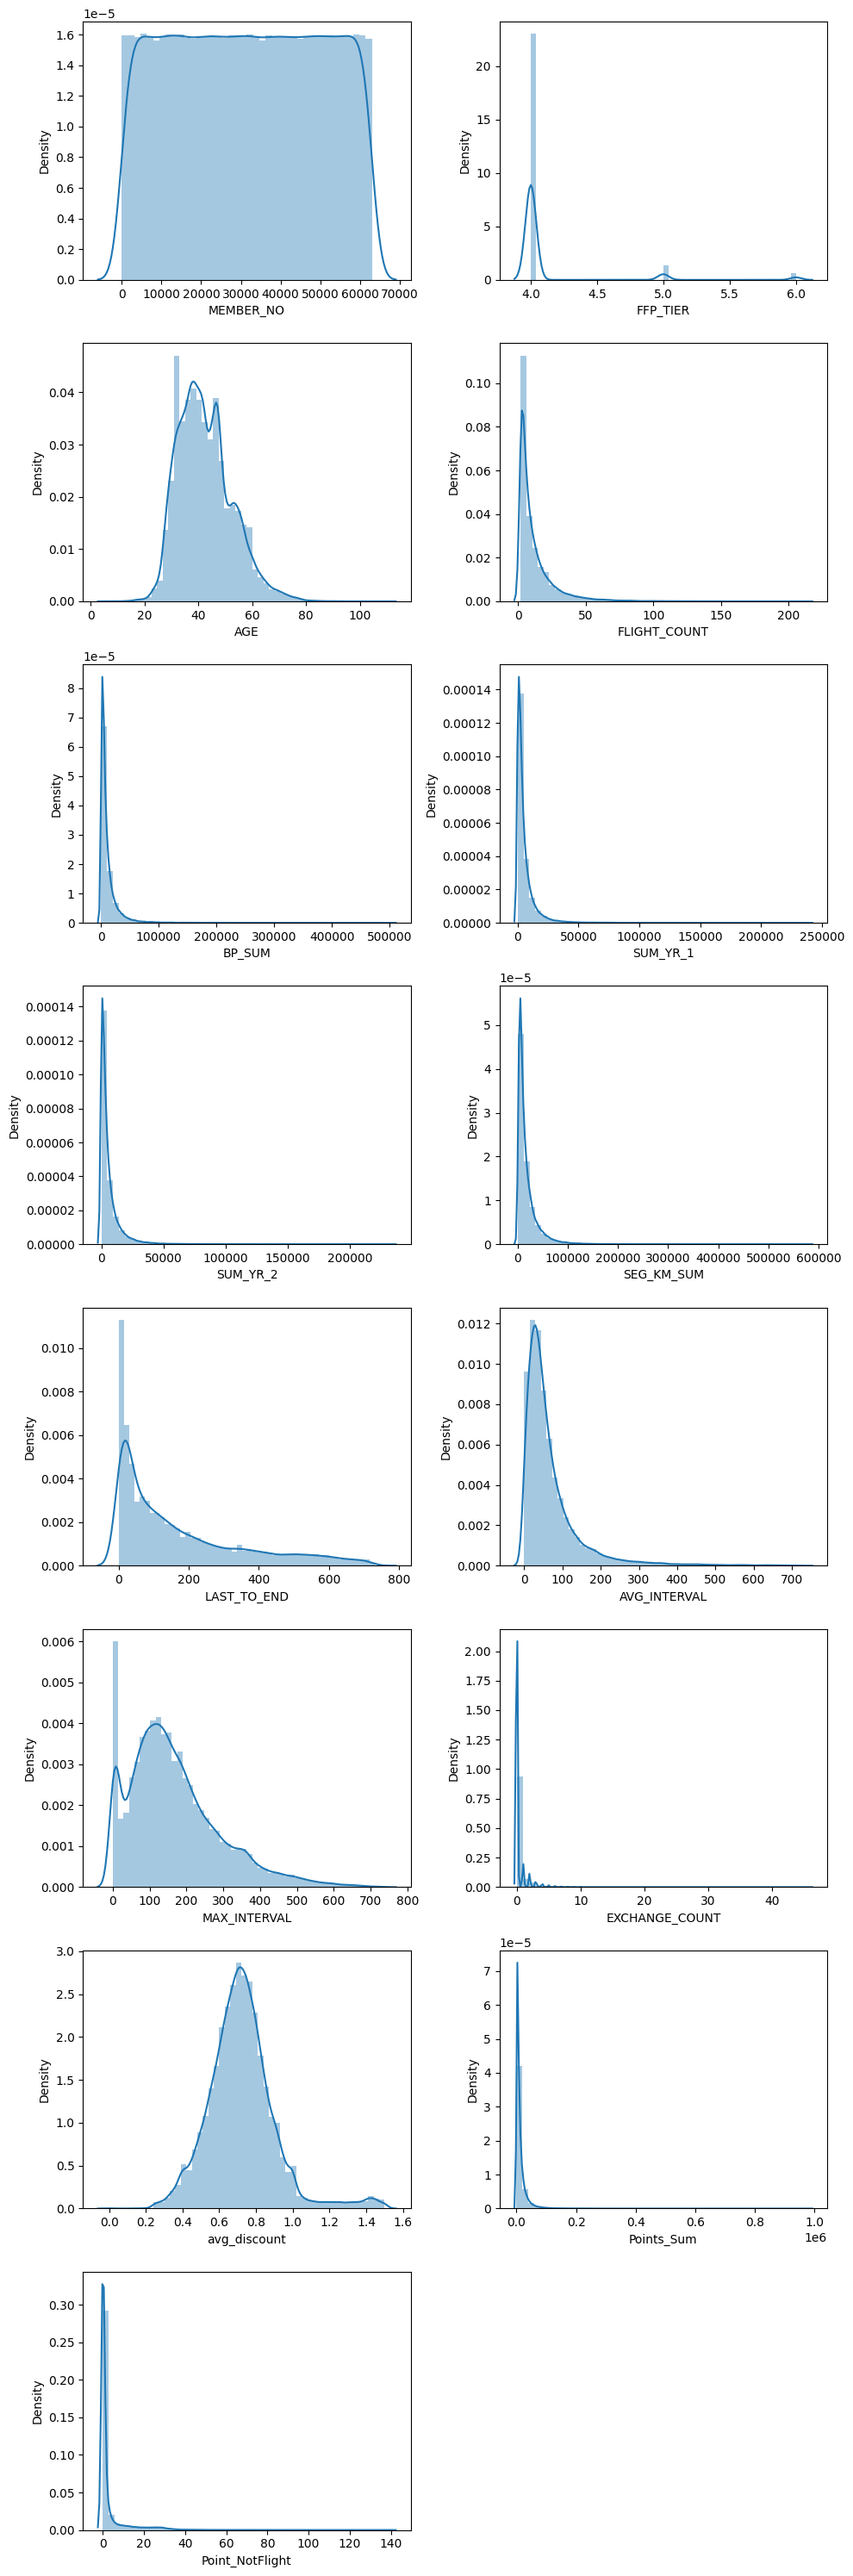

In [ ]:
# distribution plot for numerical data

plt.figure(figsize=(10, 30))
for i in range(0, len(numeric)):
    plt.subplot(8, 2,i+1)
    sns.distplot(df_clean[numeric[i]])
    plt.tight_layout()

Mayoritas kolom terlihat memiliki distribusi Skew Kanan, kecuali untuk kolom MEMBER_NO, FFP_TIER, dan avg_discount

## Multivariate Analysis

### Correlation Heatmap

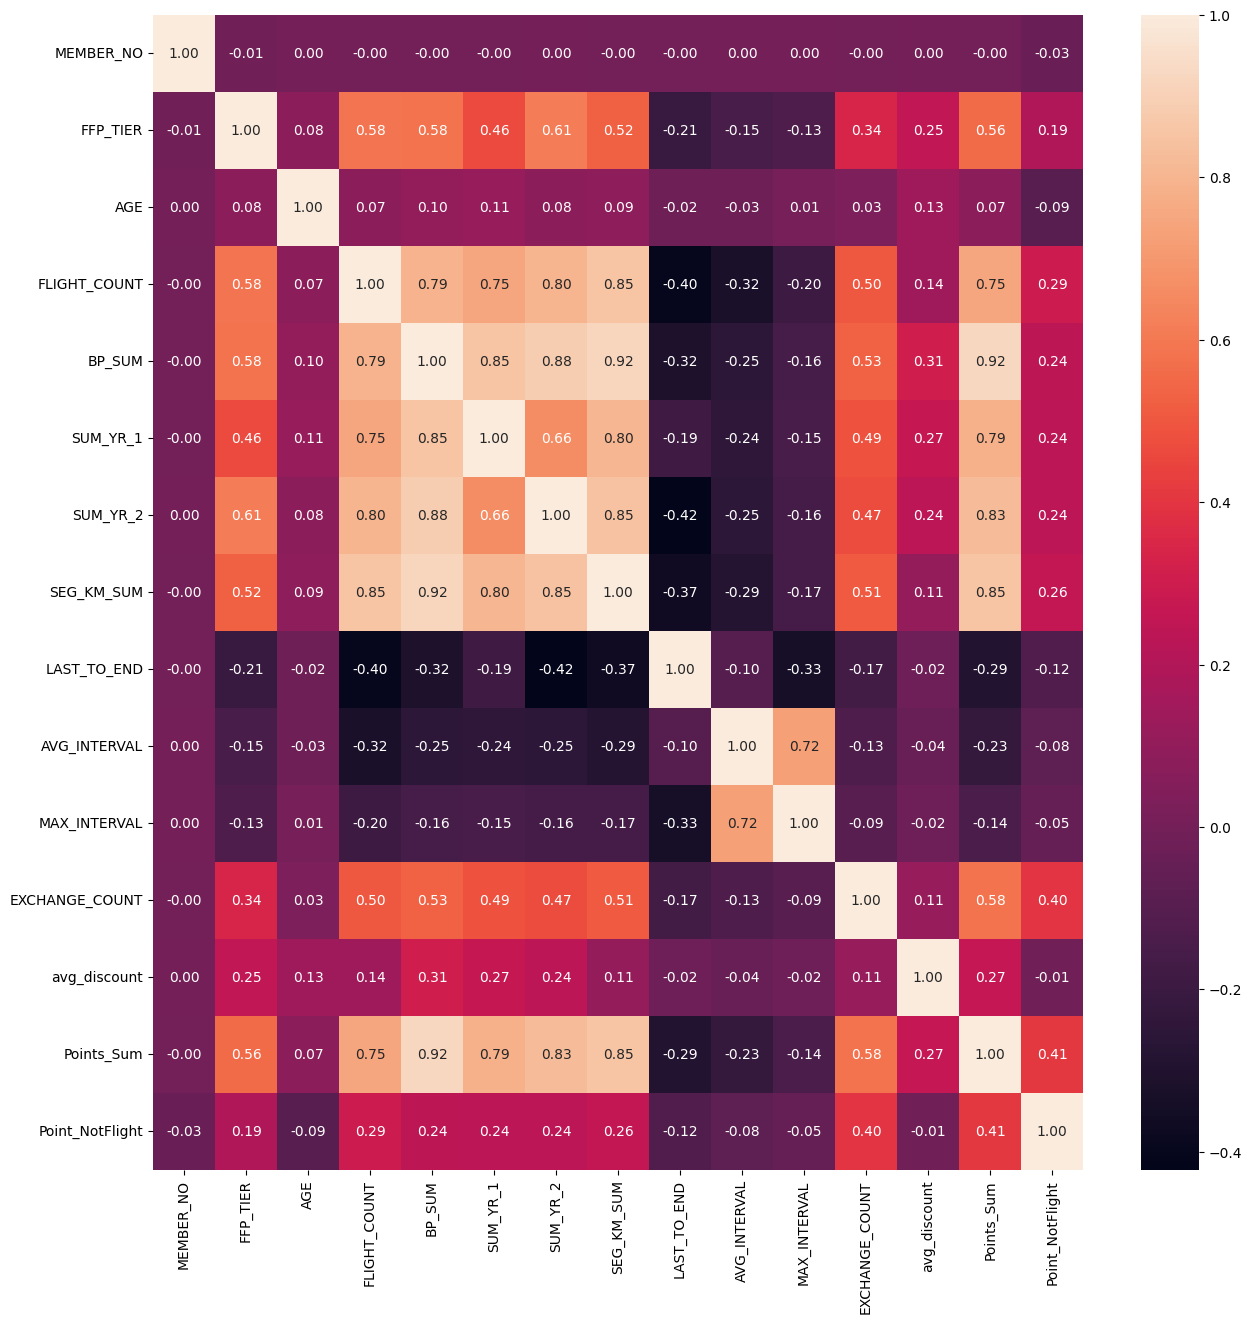

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_clean[numeric].corr(), annot=True, fmt='.2f')
plt.show()

Terdapat beberapa korelasi yang sangat kuat antar atribut seperti:
1. BP_SUM dengan SEG_KM_SUM sebesar 0.92
2. BP_SUM dengan SUM_YR_2 sebesar 0.88
3. BP_SUM dengan SUM_YR_1 sebesar 0.85
4. Flight_COUNT dengan SEG_KM_SUM sebesar 0.85
5. SUM_YR_2 dengan SEG_KM_SUM sebesar 0.85
6. SEG_KM_SUM dengan Points_SUM sebesar 0.85

# Outliers

In [ ]:
df_clean[df_clean.AGE > 100]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
23268,20264,2005-04-14,2005-05-18,Female,4,shenzhenshi,guangdong,CN,110,2014-03-31,...,2888.0,14053,2013-04-06,361,50.333333,214,1,0.740881,11194,3


In [ ]:
df_clean.drop(df_clean[df_clean.AGE > 100].index, inplace = True)

# Feature Selection

In [ ]:
df_features = df_clean.copy()

In [ ]:
type(df_clean)

pandas.core.frame.DataFrame

In [ ]:
selected_columns = [
    'AGE', 'FFP_TIER', 'FLIGHT_COUNT', 'BP_SUM',
    'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END',
    'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT',
    'avg_discount', 'Points_Sum', 'Point_NotFlight'
]

df_features = df_clean[selected_columns].copy()

# Normalization/Standardization

In [ ]:
# Before scaling
df_features.describe().apply(lambda x: x.apply('{0:.5f}'.format))

,AGE,FFP_TIER,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,61855.00000,61855.00000,61855.00000,61855.00000,61855.00000,61855.00000,61855.00000,61855.00000,61855.00000,61855.00000,61855.00000,61855.00000,61855.00000,61855.00000
mean,42.49002,4.10345,11.96448,11041.48711,5374.92957,5662.12625,17303.86258,172.60390,68.15522,167.46080,0.32418,0.72165,12681.70500,2.75942
std,9.88391,0.37584,14.11616,16394.60842,8124.01773,8702.79505,21040.43720,181.23425,77.68470,123.15587,1.14399,0.18479,20597.65858,7.40630
min,6.00000,4.00000,2.00000,0.00000,0.00000,0.00000,368.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,35.00000,4.00000,3.00000,2591.00000,1020.00000,833.00000,4866.50000,29.00000,23.75000,81.00000,0.00000,0.61265,2847.50000,0.00000
50%,41.00000,4.00000,7.00000,5800.00000,2816.00000,2826.00000,10183.00000,105.00000,45.00000,144.00000,0.00000,0.71183,6442.00000,0.00000
75%,48.00000,4.00000,15.00000,12975.50000,6600.00000,6912.00000,21498.00000,260.00000,82.50000,229.00000,0.00000,0.80883,14457.50000,1.00000
max,92.00000,6.00000,213.00000,505308.00000,239560.00000,234188.00000,580717.00000,731.00000,728.00000,728.00000,46.00000,1.50000,985572.00000,140.00000


In [ ]:
# Normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

norm_col = ['FLIGHT_COUNT', 'BP_SUM',
    'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END',
    'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'Points_Sum', 'Point_NotFlight']

for col in norm_col:
  df_features[col + '_NORM'] = MinMaxScaler().fit_transform(df_features[col].values.reshape(len(df_features), 1))

# Standardization
df_features['AGE_STD'] = StandardScaler().fit_transform(df_features['AGE'].values.reshape(len(df_features), 1))
df_features['avg_discount_STD'] = StandardScaler().fit_transform(df_features['avg_discount'].values.reshape(len(df_features), 1))

In [ ]:
# After scaling
df_features.describe().apply(lambda x: x.apply('{0:.5f}'.format))

,AGE,FFP_TIER,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,...,SUM_YR_2_NORM,SEG_KM_SUM_NORM,LAST_TO_END_NORM,AVG_INTERVAL_NORM,MAX_INTERVAL_NORM,EXCHANGE_COUNT_NORM,Points_Sum_NORM,Point_NotFlight_NORM,AGE_STD,avg_discount_STD
count,61855.00000,61855.00000,61855.00000,61855.00000,61855.00000,61855.00000,61855.00000,61855.00000,61855.00000,61855.00000,...,61855.00000,61855.00000,61855.00000,61855.00000,61855.00000,61855.00000,61855.00000,61855.00000,61855.00000,61855.00000
mean,42.49002,4.10345,11.96448,11041.48711,5374.92957,5662.12625,17303.86258,172.60390,68.15522,167.46080,...,0.02418,0.02918,0.23507,0.09362,0.23003,0.00705,0.01287,0.01971,-0.00000,0.00000
std,9.88391,0.37584,14.11616,16394.60842,8124.01773,8702.79505,21040.43720,181.23425,77.68470,123.15587,...,0.03716,0.03625,0.24827,0.10671,0.16917,0.02487,0.02090,0.05290,1.00001,1.00001
min,6.00000,4.00000,2.00000,0.00000,0.00000,0.00000,368.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-3.69189,-3.90520
25%,35.00000,4.00000,3.00000,2591.00000,1020.00000,833.00000,4866.50000,29.00000,23.75000,81.00000,...,0.00356,0.00775,0.03836,0.03262,0.11126,0.00000,0.00289,0.00000,-0.75781,-0.58986
50%,41.00000,4.00000,7.00000,5800.00000,2816.00000,2826.00000,10183.00000,105.00000,45.00000,144.00000,...,0.01207,0.01691,0.14247,0.06181,0.19780,0.00000,0.00654,0.00000,-0.15075,-0.05315
75%,48.00000,4.00000,15.00000,12975.50000,6600.00000,6912.00000,21498.00000,260.00000,82.50000,229.00000,...,0.02951,0.03641,0.35479,0.11332,0.31456,0.00000,0.01467,0.00714,0.55747,0.47177
max,92.00000,6.00000,213.00000,505308.00000,239560.00000,234188.00000,580717.00000,731.00000,728.00000,728.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,5.00919,4.21205


In [ ]:
df_features_std = df_features.copy()
df_features_std = df_features_std[['FLIGHT_COUNT_NORM', 'BP_SUM_NORM',
    'SUM_YR_1_NORM', 'SUM_YR_2_NORM', 'SEG_KM_SUM_NORM', 'LAST_TO_END_NORM',
    'AVG_INTERVAL_NORM', 'MAX_INTERVAL_NORM', 'EXCHANGE_COUNT_NORM', 'Points_Sum_NORM', 'Point_NotFlight_NORM', 'AGE_STD', 'avg_discount_STD']]

In [ ]:
df_features_std.head()

,FLIGHT_COUNT_NORM,BP_SUM_NORM,SUM_YR_1_NORM,SUM_YR_2_NORM,SEG_KM_SUM_NORM,LAST_TO_END_NORM,AVG_INTERVAL_NORM,MAX_INTERVAL_NORM,EXCHANGE_COUNT_NORM,Points_Sum_NORM,Point_NotFlight_NORM,AGE_STD,avg_discount_STD
0,0.985782,1.000000,1.000000,1.000000,1.000000,0.000000,0.004785,0.024725,0.739130,0.628833,0.357143,-1.162507,1.298709
1,0.654028,0.717345,0.715825,0.714956,0.505403,0.008219,0.007135,0.023352,0.630435,0.421855,0.235714,-0.049578,2.871698
2,0.630332,0.694941,0.682994,0.704485,0.488230,0.013699,0.007278,0.024725,0.434783,0.412310,0.185714,-0.251928,2.884475
3,0.099526,0.667541,0.485682,0.535894,0.484136,0.131507,0.038274,0.100275,0.239130,0.377653,0.085714,2.176280,1.998040
4,0.710900,0.541935,0.519953,0.558107,0.533403,0.005479,0.006577,0.064560,0.586957,0.343773,0.278571,0.557475,1.347515


# Clustering (K-Means)

## Inertia

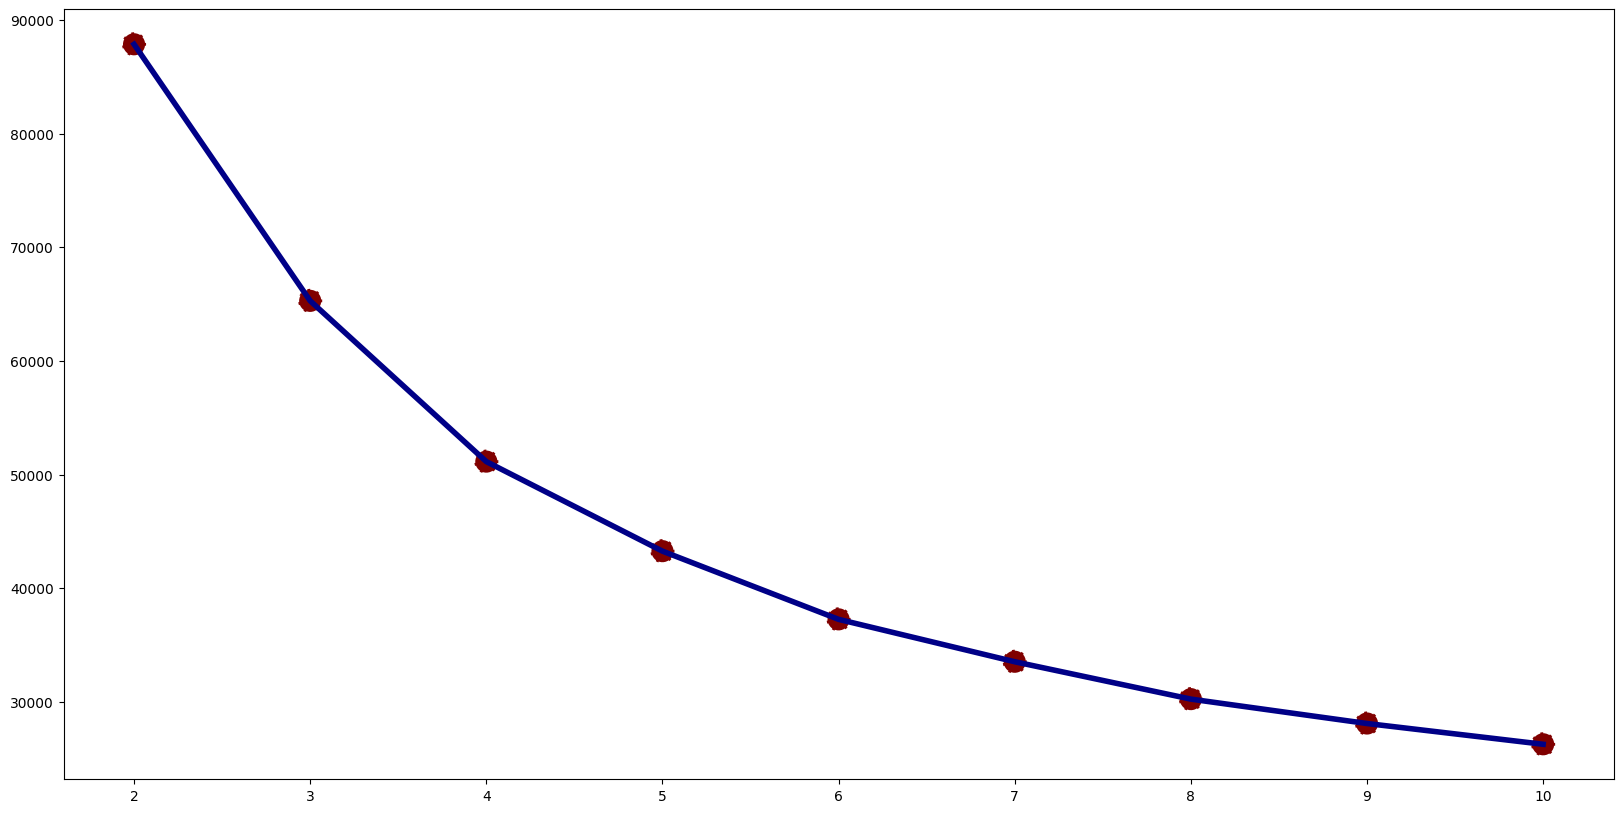

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_features_std)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.show()

## Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_features_std)
    preds = kmeans.predict(df_features_std)

    score_euclidean = silhouette_score(df_features_std, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

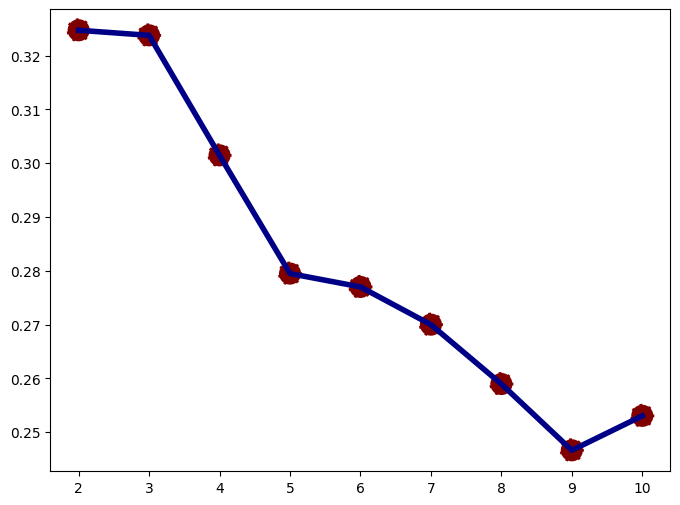

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')
plt.show()

Dilihat dari evaluasi menggunakan Inertia atau Silhouette Score, diperoleh informasi jumlah cluster yang ideal adalah 2 cluster.

# PCA

## Cluster

### K2

In [ ]:
df_k2 = df_clean.copy()

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_features_std)

In [ ]:
k2 = kmeans.labels_

In [ ]:
df_k2['clusters_k2'] = k2

In [ ]:
df_k2.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,clusters_k2
58302,29741,2009-07-25,2009-07-25,Male,4,wuhanshi,hubeisheng,CN,54,2014-03-31,...,2266,2014-03-31,1,283.000000,283,0,0.675000,1521,0,1
12748,62453,2008-04-03,2008-04-03,Female,4,changchun,jilin,CN,72,2014-03-31,...,13348,2013-12-27,96,62.142857,374,0,1.365807,16592,0,1
23630,9968,2006-12-26,2009-09-03,Male,4,haerbin,heilongjiang,CN,46,2014-03-31,...,16057,2013-11-17,136,83.142857,191,0,0.636035,7043,0,0
59119,25782,2010-04-23,2014-03-15,Male,4,Miryang-si,Gyeongsangnam-do,KR,66,2014-03-31,...,2422,2014-03-19,13,4.000000,4,0,0.580000,580,0,1
28956,40012,2009-01-29,2009-01-29,Female,4,zhongqing,zhongqing,CN,48,2014-03-31,...,10456,2013-10-31,153,38.666667,124,0,0.751517,6508,0,1


### K3

In [ ]:
df_k3 = df_clean.copy()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_features_std)

In [ ]:
k3 = kmeans.labels_

In [ ]:
df_k3['clusters_k3'] = k3

In [ ]:
df_k3.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,clusters_k3
16419,52118,2012-10-08,2012-10-08,Female,4,beijing,beijing,CN,51,2014-03-31,...,16304,2013-11-21,132,58.428571,234,0,0.905091,12580,0,2
22936,62243,2013-02-13,2013-02-19,Male,4,haerbin,heilongjiang,CN,47,2014-03-31,...,13366,2013-12-21,102,38.125000,124,0,0.792869,9596,0,1
52374,41022,2010-11-29,2010-11-29,Female,4,guangzhou,guangdong,CN,38,2014-03-31,...,5586,2014-02-16,45,4.000000,4,0,0.430000,1942,0,0
48115,57576,2010-04-07,2010-04-09,Male,4,shenyang,liaoning,CN,49,2014-03-31,...,3465,2014-02-12,49,88.250000,307,0,0.886508,2984,6,2
42483,32271,2011-08-16,2011-08-16,Male,4,zhengzhou,henan,CN,26,2014-03-31,...,6767,2012-11-02,516,40.750000,83,0,0.607677,2868,0,0


## Plot

### K2

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(df_features_std)
pcs = pca.transform(df_features_std)

df_pca_k2 = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca_k2['clusters_k2'] = k2
df_pca_k2.head()

,PC 1,PC 2,clusters_k2
0,0.139039,-1.763940,0
1,2.025210,-2.080850,1
2,1.890093,-2.232083,1
3,2.969597,0.117200,1
4,1.371824,-0.571711,1


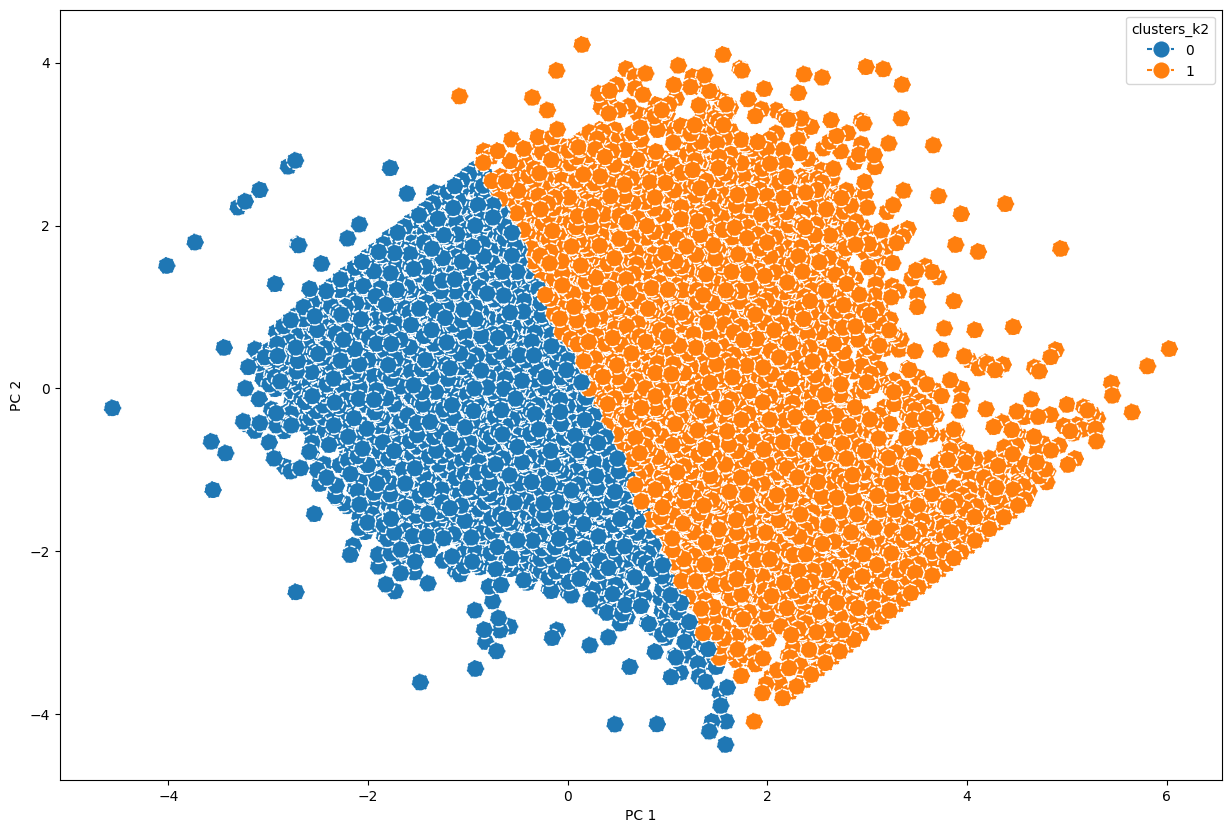

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x='PC 1', y='PC 2',
    hue='clusters_k2',
    linestyle='--',
    data=df_pca_k2,
    s=160,
    ax=ax
)

plt.show()

### K3

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(df_features_std)
pcs = pca.transform(df_features_std)

df_pca_k3 = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca_k3['clusters_k3'] = k3
df_pca_k3.head()

,PC 1,PC 2,clusters_k3
0,0.139039,-1.763940,2
1,2.025210,-2.080850,2
2,1.890093,-2.232083,2
3,2.969597,0.117200,2
4,1.371824,-0.571711,2


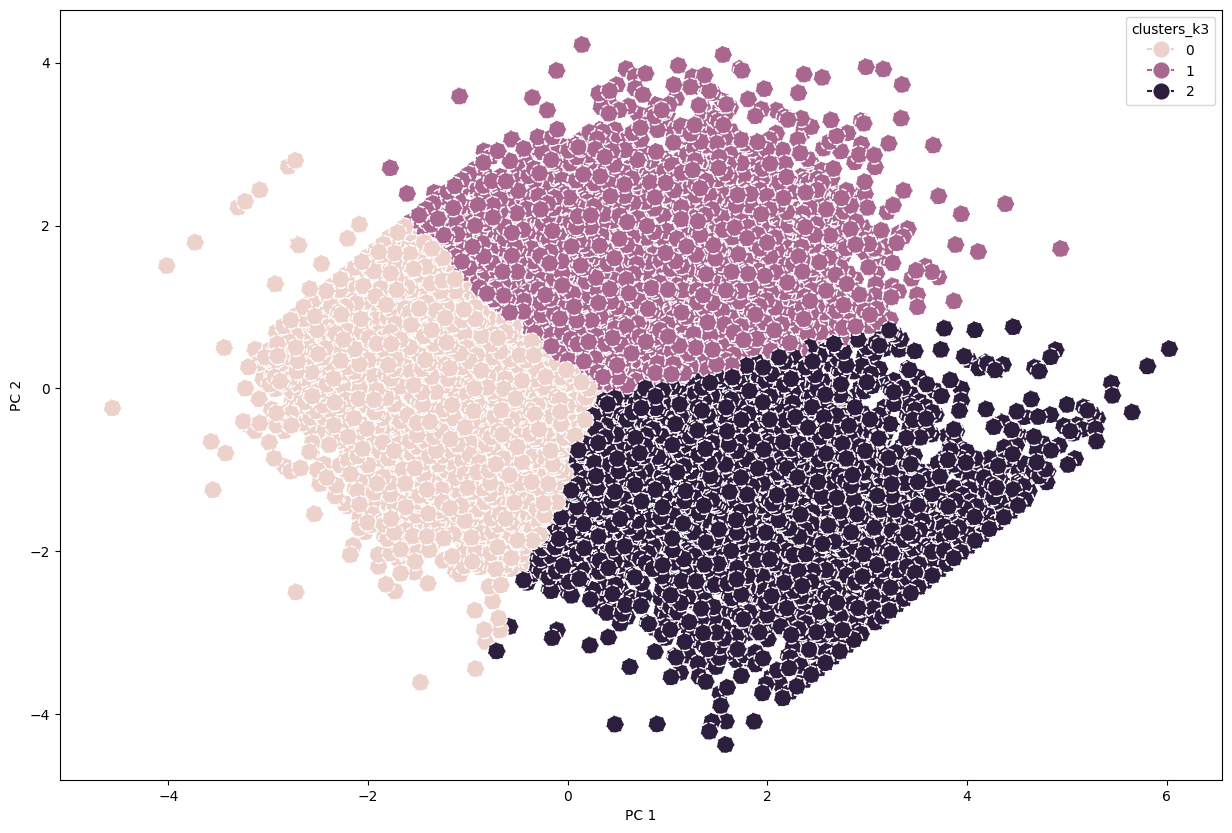

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x='PC 1', y='PC 2',
    hue='clusters_k3',
    linestyle='--',
    data=df_pca_k3,
    s=160,
    ax=ax
)

plt.show()

## Analysis

Rekomendasi menggunakan K = 3
Karena:

1. Visual cluster dengan PCA terlihat bermakna.

2. Skor Silhouette masih cukup tinggi di K = 3.

3. Memberikan pemisahan segmentasi yang lebih informatif dibanding K = 2.

In [ ]:
df_k3[['FLIGHT_COUNT', 'BP_SUM',
    'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END',
    'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'Points_Sum', 'Point_NotFlight', 'AGE', 'avg_discount', 'clusters_k3']].groupby('clusters_k3').agg(['mean','median'])

FLIGHT_COUNT               BP_SUM             SUM_YR_1          \
                    mean median          mean  median         mean  median   
clusters_k3                                                                  
0              11.254006    7.0   9078.415199  5085.0  4414.074726  2400.0   
1              12.623466    8.0  10681.074443  6169.0  5430.596454  3122.0   
2              12.834492    6.0  17090.188925  7652.0  7947.755260  3800.0   

                SUM_YR_2            SEG_KM_SUM           ... EXCHANGE_COUNT  \
                    mean  median          mean   median  ...           mean   
clusters_k3                                              ...                  
0            4930.033857  2602.0  16207.453689   9835.0  ...       0.290021   
1            5646.051631  3138.0  18940.096307  11802.0  ...       0.291976   
2            7720.142266  3028.0  17611.633859   8442.0  ...       0.472753   

                      Points_Sum         Point_NotFlight               AGE  \
            median          mean  median            mean median       mean   
clusters_k3                                                                  
0              0.0  10759.947612  5820.0        3.430366    0.0  35.658290   
1              0.0  11921.948001  6669.0        1.866656    0.0  52.966704   
2              0.0  19283.089973  8234.0        2.389735    0.0  43.937671   

                   avg_discount            
            median         mean    median  
clusters_k3                                
0             36.0     0.656827  0.675377  
1             51.0     0.670114  0.684176  
2             44.0     0.987606  0.925000  

[3 rows x 26 columns]

In [ ]:
count_df = (df_k3['clusters_k3'].value_counts()
            .to_frame('total_members')
            .reset_index()
            .rename(columns={'index': 'clusters_k3'}))

count_df

,clusters_k3,total_members
0,0,31515
1,1,18981
2,2,11359


## Insight & Recommendation

### Analisis Klaster (K=3)

**1. Cluster 0 – Pelanggan Aktif dan Loyal**

* Flight Count: Sedikit lebih tinggi dari yang lain (rata-rata ~11.97).
* Points: Total poin dan distance lebih tinggi dari klaster lain.
* Exchange Count: Sedikit lebih tinggi dalam penukaran poin.
* Age: Rata-rata usia 42.56 tahun.
* avg_discount: Sedikit lebih tinggi (0.7229).

Karakteristik Unik:

* Pelanggan dengan frekuensi penerbangan tinggi dan loyal.
* Aktif dalam penukaran poin dan memperoleh diskon yang layak.

Rekomendasi:

* Tawarkan program loyalitas eksklusif (misalnya upgrade tier otomatis).
* Gunakan email marketing personal dengan reward berdasarkan histori penukaran.
* Fokus pada retensi dan cross-sell, seperti promosi hotel atau mobil sewaan.


**2. Cluster 1 – Pelanggan Pasif atau Potensial**

* Flight Count dan Jarak Tempuh: Lebih rendah dibanding Cluster 0.
* Points Not Flight: Hampir setara tapi penukaran poin lebih rendah.
* Exchange Count: Paling rendah (0.309).
* Age: Rata-rata 42.40 tahun.
* avg_discount: Hampir sama tapi tidak terlalu aktif menggunakan.

Karakteristik Unik:

* Pelanggan pasif yang jarang terbang atau belum tergugah untuk menggunakan poin.

Rekomendasi:

* Berikan edukasi manfaat poin (misalnya notifikasi sisa poin & expiry).
* Tawarkan promo diskon besar saat mendekati masa berlaku poin.
* Uji coba retargeting ads dengan tawaran bundling (flight + benefit).


**3. Cluster 2 – Pelanggan Menengah Stabil**

* Semua metrik berada di tengah-tengah, sedikit di bawah Cluster 0 dan di atas Cluster 1.
* Exchange dan Points: Mendekati Cluster 0.
* Age dan avg_discount: Serupa dengan lainnya.

Karakteristik Unik:

* Pelanggan potensial yang stabil, memiliki potensi untuk menjadi loyal.

Rekomendasi:

* Tawarkan program insentif untuk meningkatkan frekuensi penerbangan.

* Berikan early access ke diskon atau fitur eksklusif.

* Fokus pada pengalaman pelanggan (UX boarding, upgrade seats, customer service premium).